# Muliple Linear Regression on Movie Collection dataset
## Data Preprocessing

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Importing Dataset
dataset = pd.read_csv("Movie_collection_train.csv")

# Data Summary
dataset.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,392.000000,400.000000,400.000000,400.000000
mean,48646.500000,55.017181,73.832700,0.469881,35197.771537,137.581750,7.810275,7.982813,7.813375,7.993888,7.894100,463223.567500,157.790000,258.083840,38.715000,523.650000
std,18308.499136,119.755634,13.023426,0.113920,4075.766926,28.990673,1.088694,1.089923,1.093581,1.088619,0.672413,65225.567649,31.723517,94.621476,12.651043,103.661283
min,10000.000000,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,215432.000000,0.000000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.360000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,159.720000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,183.210000,283.444000,50.000000,571.000000
max,100000.000000,1799.524000,106.300000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_Actor_Rating    400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

## Data Visualization

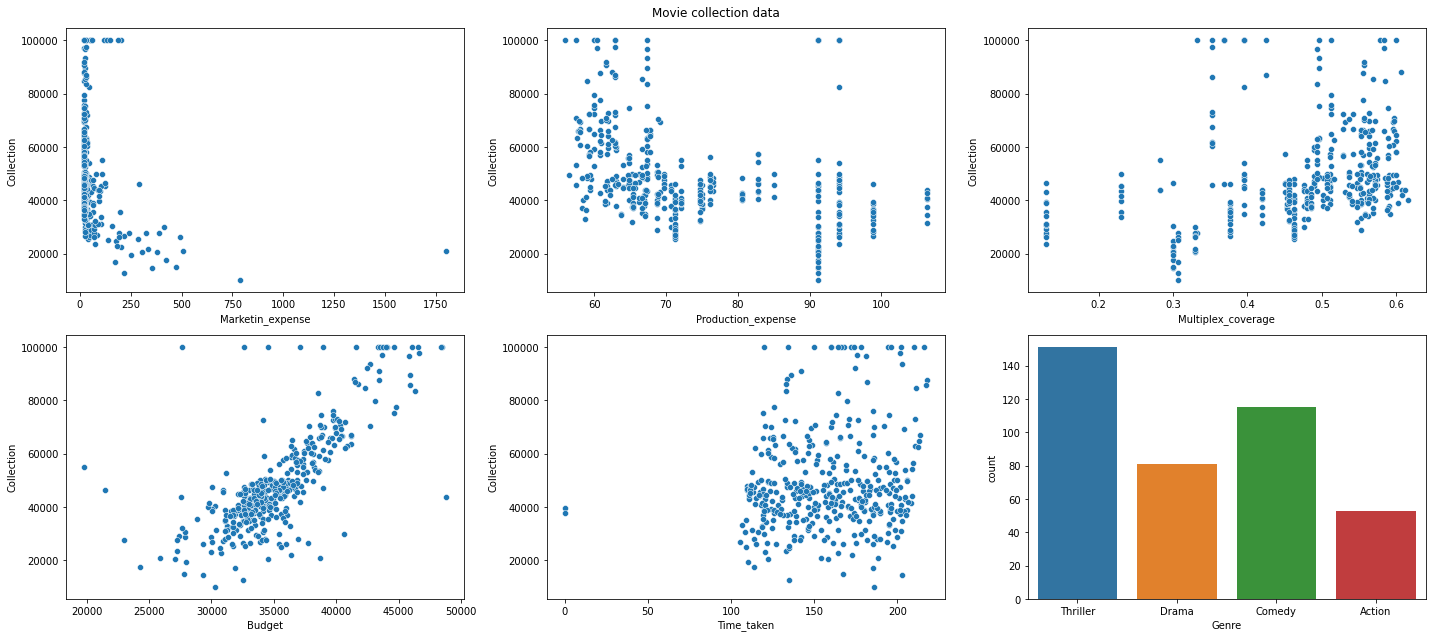

In [4]:
# Visualizing data using subplots
fig, axes = plt.subplots(2,3,figsize=(20,9),)
fig.suptitle("Movie collection data")

y = dataset['Collection']
sns.scatterplot(ax = axes[0][0], x = "Marketin_expense", y = y, data = dataset) 
sns.scatterplot(ax = axes[0][1], x = "Production_expense", y = y, data = dataset )
sns.scatterplot(ax = axes[0][2], x = "Multiplex_coverage", y = y, data = dataset )
sns.scatterplot(ax = axes[1][0], x = "Budget", y = y, data = dataset )
sns.scatterplot(ax = axes[1][1], x = "Time_taken", y = y, data = dataset )
sns.countplot(ax = axes[1][2], x="Genre", data = dataset,)
fig.tight_layout()

## Handling Missing Values

In [5]:
# Filling missing values in 'Time_taken' by mean.
dataset['Time_taken'].fillna(dataset['Time_taken'].mean(), inplace = True)

In [6]:
# Missing values are treated properly..!
dataset.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_Actor_Rating      0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

## Checking Outliers

In [7]:
# Calculating percentiles
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
# IQR = Inter Quartile Range
IQR = Q3 - Q1

In [8]:
# Checking for any outliers
((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()

3D_available            0
Avg_age_actors          0
Budget                 20
Collection             29
Critic_rating           0
Director_rating         5
Genre                   0
Lead_Actor_Rating       5
Lead_Actress_rating     3
MPAA_film_rating        0
Marketin_expense       64
Movie_length            0
Multiplex_coverage     16
Num_multiplex          20
Producer_rating         4
Production_expense      0
Time_taken              2
Trailer_views          22
Twitter_hastags         1
dtype: int64

In [9]:
# Finding the outliers below lower bound. 
lower = (dataset < (Q1 - 1.5 * IQR))
print(lower.sum())

# filling the outliers (below lower bound) with nan values
dataset[lower] = np.nan

3D_available            0
Avg_age_actors          0
Budget                  5
Collection              0
Critic_rating           0
Director_rating         5
Genre                   0
Lead_Actor_Rating       5
Lead_Actress_rating     3
MPAA_film_rating        0
Marketin_expense        0
Movie_length            0
Multiplex_coverage     16
Num_multiplex           0
Producer_rating         4
Production_expense      0
Time_taken              2
Trailer_views          22
Twitter_hastags         0
dtype: int64


In [10]:
# Finding lower bound of every column of dataset
lower_bound = Q1 - 1.5 * IQR
lower_bound

Collection               9750.000000
Marketin_expense            1.347425
Production_expense         33.865000
Multiplex_coverage          0.210500
Budget                  26091.140625
Movie_length               29.837500
Lead_Actor_Rating           4.643750
Lead_Actress_rating         4.762500
Director_rating             4.699375
Producer_rating             4.787500
Critic_rating               5.700000
Trailer_views          330448.000000
Time_taken                 59.540000
Twitter_hastags           134.344000
Avg_age_actors            -10.000000
Num_multiplex             271.000000
dtype: float64

In [11]:
# Filling nan values (which are our outliers) with lower bounds..!
dataset.fillna(lower_bound, inplace=True)

In [12]:
# Finding the outliers above upper bound. 
upper = (dataset > (Q3 + 1.5 * IQR))
print(upper.sum())

# filling the outliers (above upper bound) with nan values
dataset[upper] = np.nan

3D_available            0
Avg_age_actors          0
Budget                 15
Collection             29
Critic_rating           0
Director_rating         0
Genre                   0
Lead_Actor_Rating       0
Lead_Actress_rating     0
MPAA_film_rating        0
Marketin_expense       64
Movie_length            0
Multiplex_coverage      0
Num_multiplex          20
Producer_rating         0
Production_expense      0
Time_taken              0
Trailer_views           0
Twitter_hastags         1
dtype: int64


In [13]:
# Finding upper bound of every column of dataset
upper_bound = Q3 + 1.5 * IQR
upper_bound

Collection              84550.000000
Marketin_expense           54.612825
Production_expense        112.225000
Multiplex_coverage          0.766500
Budget                  43772.705625
Movie_length              246.737500
Lead_Actor_Rating          11.173750
Lead_Actress_rating        11.402500
Director_rating            11.164375
Producer_rating            11.417500
Critic_rating              10.020000
Trailer_views          614036.000000
Time_taken                256.900000
Twitter_hastags           372.904000
Avg_age_actors             86.000000
Num_multiplex             751.000000
dtype: float64

In [14]:
# Filling nan values (which are our outliers) with upper bounds..!
dataset.fillna(upper_bound, inplace=True)

In [15]:
# Data summary
dataset.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,47836.375000,30.062752,73.832700,0.473141,35152.185819,137.581750,7.812959,7.984756,7.816517,7.996113,7.894100,465785.520000,158.087700,253.960100,38.715000,521.277500
std,16275.702884,12.502642,13.023426,0.104906,3732.440361,28.990673,1.080057,1.083535,1.083652,1.081352,0.672413,58346.324314,30.161242,34.171407,12.651043,97.371935
min,10000.000000,20.126400,55.920000,0.210500,26091.140625,76.400000,4.643750,4.762500,4.699375,4.787500,6.600000,330448.000000,59.540000,201.632000,3.000000,333.000000
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,7.092500,7.252500,7.123750,7.273750,7.320000,436793.500000,133.550000,223.804000,26.000000,451.000000
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,7.995000,8.157500,7.990000,8.140000,7.960000,474930.000000,158.760000,246.680000,39.000000,510.000000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,8.725000,8.912500,8.740000,8.931250,8.400000,507690.500000,182.890000,283.444000,50.000000,571.000000
max,84550.000000,54.612825,106.300000,0.615000,43772.705625,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,372.904000,60.000000,751.000000


In [16]:
#Lead_ Actor_Ratin, Lead_Actress_rating, Director_rating, Producer_rating &	Critic_rating seams similarly ditributed, so lets take avg of 5 and create a new variable.
dataset['Team_avg_rating'] = (dataset.Lead_Actor_Rating + dataset.Lead_Actress_rating + dataset.Director_rating + dataset.Producer_rating +                                    dataset.Critic_rating) / 5

In [17]:
# Deleting 5 columns because we've already taken their average
del dataset['Lead_Actor_Rating']
del dataset['Lead_Actress_rating']
del dataset['Director_rating']
del dataset['Producer_rating']
del dataset['Critic_rating']

In [18]:
# All the values are same i.e "PG". Therefore removing the column won't affect out model
del dataset["MPAA_film_rating"]

In [19]:
# Data summary
dataset.describe()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Team_avg_rating
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,47836.375000,30.062752,73.832700,0.473141,35152.185819,137.581750,465785.520000,158.087700,253.960100,38.715000,521.277500,7.900889
std,16275.702884,12.502642,13.023426,0.104906,3732.440361,28.990673,58346.324314,30.161242,34.171407,12.651043,97.371935,0.862846
min,10000.000000,20.126400,55.920000,0.210500,26091.140625,76.400000,330448.000000,59.540000,201.632000,3.000000,333.000000,5.101125
25%,37800.000000,21.321950,63.250000,0.419000,32721.727500,111.175000,436793.500000,133.550000,223.804000,26.000000,451.000000,7.317750
50%,45000.000000,23.214700,69.030000,0.494500,34593.762500,142.250000,474930.000000,158.760000,246.680000,39.000000,510.000000,8.033000
75%,56500.000000,34.638300,82.840000,0.558000,37142.118750,165.400000,507690.500000,182.890000,283.444000,50.000000,571.000000,8.563500
max,84550.000000,54.612825,106.300000,0.615000,43772.705625,173.500000,567784.000000,217.520000,372.904000,60.000000,751.000000,9.283000


## Encoding Categorical Data

In [20]:
dataset.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available,Team_avg_rating
0,48000.0,20.1264,59.62,0.462,36524.125,138.7,527367.0,109.60,223.840,Thriller,23,494.0,YES,7.953
1,43200.0,20.5462,69.14,0.531,35668.655,152.4,494055.0,146.64,243.456,Drama,42,462.0,NO,7.501
2,69400.0,20.5458,69.14,0.531,39912.675,134.6,547051.0,147.88,372.904,Comedy,38,458.0,NO,7.501
3,66800.0,20.6474,59.36,0.542,38873.890,119.3,516279.0,185.36,225.344,Drama,45,472.0,YES,7.226
4,72400.0,21.3810,59.36,0.542,39701.585,127.7,531448.0,176.48,225.792,Drama,55,395.0,NO,7.227


In [21]:
dataset = pd.get_dummies(dataset)

In [22]:
dataset.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Team_avg_rating,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_NO,3D_available_YES
0,48000.0,20.1264,59.62,0.462,36524.125,138.7,527367.0,109.60,223.840,23,494.0,7.953,0,0,0,1,0,1
1,43200.0,20.5462,69.14,0.531,35668.655,152.4,494055.0,146.64,243.456,42,462.0,7.501,0,0,1,0,1,0
2,69400.0,20.5458,69.14,0.531,39912.675,134.6,547051.0,147.88,372.904,38,458.0,7.501,0,1,0,0,1,0
3,66800.0,20.6474,59.36,0.542,38873.890,119.3,516279.0,185.36,225.344,45,472.0,7.226,0,0,1,0,0,1
4,72400.0,21.3810,59.36,0.542,39701.585,127.7,531448.0,176.48,225.792,55,395.0,7.227,0,0,1,0,1,0


In [23]:
# 3D_available_NO and 3D_available_YES has full negative co-relation so we can delete one column.
del dataset['3D_available_NO']

## Co-relation Matrix

In [24]:
dataset.corr()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Team_avg_rating,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller,3D_available_YES
Collection,1.000000,-0.315190,-0.425773,0.352528,0.786561,-0.327965,0.737920,0.132086,0.013815,0.000049,-0.315119,-0.102489,-0.052384,-0.045664,0.021242,0.061662,0.186335
Marketin_expense,-0.315190,1.000000,0.693752,-0.846953,-0.314617,0.620811,-0.474298,0.042470,0.049248,0.045331,0.755077,0.604689,0.003715,0.023725,0.009591,-0.032700,-0.097417
Production_expense,-0.425773,0.693752,1.000000,-0.762911,-0.421795,0.609577,-0.547454,0.022968,-0.065925,0.028472,0.698338,0.646505,0.044404,0.040700,0.016143,-0.082437,-0.086836
Multiplex_coverage,0.352528,-0.846953,-0.762911,1.000000,0.332873,-0.741286,0.536865,0.017951,-0.008378,-0.074853,-0.906467,-0.766471,-0.022948,-0.029285,0.003378,0.040590,0.062517
Budget,0.786561,-0.314617,-0.421795,0.332873,1.000000,-0.253703,0.662495,0.070384,0.013947,-0.046556,-0.310279,-0.141982,0.022971,-0.055258,-0.011677,0.045207,0.168658
Movie_length,-0.327965,0.620811,0.609577,-0.741286,-0.253703,1.000000,-0.575199,-0.004398,-0.007156,0.065164,0.672094,0.703112,0.008192,0.075355,0.024897,-0.096724,0.021640
Trailer_views,0.737920,-0.474298,-0.547454,0.536865,0.662495,-0.575199,1.000000,0.103927,0.000707,-0.005878,-0.511872,-0.388678,-0.018777,-0.102759,-0.023279,0.128371,0.084378
Time_taken,0.132086,0.042470,0.022968,0.017951,0.070384,-0.004398,0.103927,1.000000,0.031610,0.028321,-0.057085,0.050912,0.038829,-0.063246,0.083389,-0.037235,-0.028121
Twitter_hastags,0.013815,0.049248,-0.065925,-0.008378,0.013947,-0.007156,0.000707,0.031610,1.000000,0.073640,0.028481,-0.000478,0.059219,0.042068,-0.023831,-0.060938,-0.002977
Avg_age_actors,0.000049,0.045331,0.028472,-0.074853,-0.046556,0.065164,-0.005878,0.028321,0.073640,1.000000,0.052574,0.005863,0.087018,-0.042941,-0.020145,-0.004067,-0.030999


# Linear Regression
## Simple Linear Regression

In [29]:
# Locating dependent and independent variables
X_slr = dataset[['Budget']].values
y_slr = dataset['Collection'].values

In [30]:
from sklearn.linear_model import LinearRegression
L_reg = LinearRegression()
L_reg.fit(X_slr,y_slr)

LinearRegression()

In [31]:
print(L_reg.intercept_, L_reg.coef_)

-72731.53596316192 [3.42988375]


In [32]:
y_pred_slr = L_reg.predict(X_slr)
y_pred_slr

array([52541.96690557, 49607.80425283, 64164.29949111, 60601.38769849,
       63440.28533004, 49779.28129097, 41815.12551924, 44863.60619742,
       34555.93090434, 41662.70148534, 48769.47206633, 41757.96650653,
       39471.6059979 , 40614.78625221, 43415.57787529, 38423.69076478,
       40348.04419287, 41395.959426  , 31221.65516259, 36385.01931125,
       33393.69764579, 40919.63432003, 44292.01607026, 38023.57767576,
       40138.46114625, 33946.23476871, 38023.57767576, 42481.98066759,
       51017.72656648, 54428.21432519, 36118.27725191, 42958.30577356,
       40633.83925645, 35889.64120104, 43415.57787529, 40309.9381844 ,
       38557.06179445, 38728.53883259, 40938.68732427, 52923.02699034,
       61096.7658087 , 56257.3027321 , 44806.4471847 , 45606.67336272,
       42901.14676084, 35527.63412051, 37509.14656132, 42158.07959554,
       30135.63392099, 34003.39378142, 40881.52831155, 43777.58495582,
       51322.5746343 , 41548.3834599 , 39452.55299366, 65383.69176238,
      

In [33]:
from sklearn.metrics import r2_score
r2_score(y_slr,y_pred_slr)

0.6186785364829042

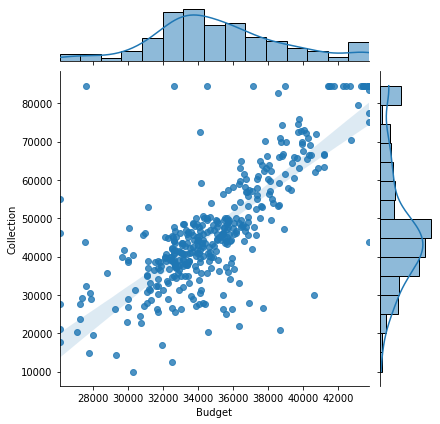

In [34]:
sns.jointplot(x=dataset['Budget'], y=dataset['Collection'],data=dataset,kind="reg")

## Multiple Linear Regression

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
# Locating dependent and independent variables
X_mlr = dataset.iloc[:,1:].values
y_mlr = dataset.iloc[:,0].values

In [37]:
multiple_reg = LinearRegression()

In [40]:
multiple_reg.fit(X_mlr, y_mlr)

LinearRegression()

In [41]:
# getting our intercept i.e W0 and coefficients W1,W2,...,Wn
print(multiple_reg.intercept_, multiple_reg.coef_)

-145696.0344820207 [ 1.17828756e+02 -1.21436929e+02  4.05601102e+04  2.07448214e+00
 -4.39001606e+01  1.11458362e-01  2.34349339e+01 -3.95385415e+00
  5.98159767e+01  2.07956325e+01  5.54925431e+03 -2.17341002e+03
  9.52378159e+02  1.40144177e+03 -1.80409913e+02  1.85187868e+03]


### Splitting the dataset into the Training set and Test set

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mlr, y_mlr, test_size = 0.25, random_state = 42)

In [43]:
print('X_train : ', X_train.shape, ' y_train : ', y_train.shape)
print('X_test  : ', X_test.shape, '  y_test  : ', y_test.shape)

X_train :  (300, 16)  y_train :  (300,)
X_test  :  (100, 16)   y_test  :  (100,)


In [44]:
reg = LinearRegression()

In [45]:
reg.fit(X_train, y_train)

LinearRegression()

In [46]:
y_test_predict  = reg.predict(X_test)
y_train_predict = reg.predict(X_train)

## R2 score

In [47]:
r2_score(y_test, y_test_predict)

0.7205685139627642

In [48]:
r2_score(y_train, y_train_predict)

0.7540212562356483

## Ridge and Lasso Regression

In [49]:
# Data normalization
from sklearn import preprocessing
sc = preprocessing.StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test  = sc.transform(X_test)

In [50]:
# checking whether our data is converted into one unit 
print("training set : " , X_train[:4])
print("testing set  : " , X_test[:4])

training set :  [[-0.48779509 -0.538454    0.899484   -0.15103197  0.53297201  0.29516051
   1.23358766 -0.32037841 -0.60079043 -0.56156066 -1.90778925 -0.38655567
  -0.65985354 -0.51039612  1.33333333 -1.14354375]
 [-0.62898421 -0.12876019  0.06797795 -0.19727366 -0.33151419 -0.75605214
  -0.66054628 -1.50178    -0.12186095 -0.6936846   0.65523222 -0.38655567
   1.51548781 -0.51039612 -0.75        0.87447463]
 [ 0.87784011 -0.19249034 -0.10019181 -0.58510723 -1.20645788  1.12771968
  -1.63000566 -1.49513224  0.59653328  0.26167317 -0.13805669 -0.38655567
   1.51548781 -0.51039612 -0.75       -1.14354375]
 [-0.73114881 -0.91628273  1.20779522 -0.80587404 -1.14371291 -0.02993105
   0.69221836 -0.91915149  0.43689012 -0.42943671 -0.87983334  2.5869495
  -0.65985354 -0.51039612 -0.75       -1.14354375]]
testing set  :  [[-0.10688392  0.17926886  0.35760365 -1.46668278  1.25802494 -1.72855093
  -0.02433857  0.27079722  1.71403541  0.41412388  0.029072   -0.38655567
   1.51548781 -0.5103961

In [51]:
# performing ridge regression on our data by specifying value of alpha.
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [52]:
# Calculating R2 score for alpha = 0.5
r2_score(y_test, ridge_reg.predict(X_test))

0.7205456521799138

### Hyper parameter tuning 

In [53]:
# getting 100 values
parameter_range = np.logspace(-2,8,100)
parameter_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [54]:
from sklearn.model_selection import validation_curve
train_score, test_score = validation_curve(Ridge(), X_train, y_train, "alpha", parameter_range, scoring="r2")

In [55]:
print(train_score)
print(test_score)

[[7.48086576e-01 7.78615434e-01 7.44307908e-01 7.47385794e-01
  7.66474430e-01]
 [7.48086573e-01 7.78615432e-01 7.44307905e-01 7.47385792e-01
  7.66474427e-01]
 [7.48086569e-01 7.78615428e-01 7.44307900e-01 7.47385790e-01
  7.66474423e-01]
 [7.48086563e-01 7.78615423e-01 7.44307893e-01 7.47385785e-01
  7.66474416e-01]
 [7.48086553e-01 7.78615414e-01 7.44307882e-01 7.47385779e-01
  7.66474404e-01]
 [7.48086536e-01 7.78615401e-01 7.44307863e-01 7.47385768e-01
  7.66474385e-01]
 [7.48086510e-01 7.78615380e-01 7.44307834e-01 7.47385751e-01
  7.66474356e-01]
 [7.48086469e-01 7.78615346e-01 7.44307788e-01 7.47385723e-01
  7.66474309e-01]
 [7.48086403e-01 7.78615292e-01 7.44307715e-01 7.47385680e-01
  7.66474234e-01]
 [7.48086298e-01 7.78615206e-01 7.44307598e-01 7.47385611e-01
  7.66474116e-01]
 [7.48086132e-01 7.78615070e-01 7.44307413e-01 7.47385501e-01
  7.66473928e-01]
 [7.48085869e-01 7.78614854e-01 7.44307119e-01 7.47385328e-01
  7.66473630e-01]
 [7.48085452e-01 7.78614512e-01 7.443066

In [56]:
mean_train_score = np.mean(train_score, axis=1)
mean_train_score

array([7.56974028e-01, 7.56974026e-01, 7.56974022e-01, 7.56974016e-01,
       7.56974006e-01, 7.56973991e-01, 7.56973966e-01, 7.56973927e-01,
       7.56973865e-01, 7.56973766e-01, 7.56973609e-01, 7.56973360e-01,
       7.56972966e-01, 7.56972343e-01, 7.56971358e-01, 7.56969807e-01,
       7.56967369e-01, 7.56963550e-01, 7.56957591e-01, 7.56948340e-01,
       7.56934062e-01, 7.56912186e-01, 7.56878955e-01, 7.56828987e-01,
       7.56754724e-01, 7.56645792e-01, 7.56488271e-01, 7.56263860e-01,
       7.55948814e-01, 7.55512413e-01, 7.54914457e-01, 7.54101115e-01,
       7.52998367e-01, 7.51502420e-01, 7.49466921e-01, 7.46687433e-01,
       7.42884664e-01, 7.37689396e-01, 7.30634079e-01, 7.21158293e-01,
       7.08636393e-01, 6.92433784e-01, 6.71991626e-01, 6.46928594e-01,
       6.17136503e-01, 5.82840743e-01, 5.44602966e-01, 5.03262164e-01,
       4.59832918e-01, 4.15393302e-01, 3.70991930e-01, 3.27587219e-01,
       2.86014022e-01, 2.46964302e-01, 2.10971804e-01, 1.78399550e-01,
      

In [57]:
max(mean_train_score)

0.7569740283607678

In [58]:
mean_test_mean = np.mean(test_score, axis=1)
mean_test_mean

array([ 0.7293065 ,  0.72930767,  0.72930914,  0.729311  ,  0.72931335,
        0.7293163 ,  0.72932002,  0.72932471,  0.7293306 ,  0.729338  ,
        0.72934729,  0.72935893,  0.7293735 ,  0.7293917 ,  0.72941436,
        0.72944248,  0.72947723,  0.72951994,  0.72957207,  0.72963516,
        0.72971068,  0.72979986,  0.72990337,  0.73002085,  0.73015037,
        0.73028764,  0.73042508,  0.73055067,  0.7306463 ,  0.73068553,
        0.73062994,  0.7304235 ,  0.72998419,  0.72919244,  0.72787668,
        0.72579706,  0.72262934,  0.71795254,  0.7112454 ,  0.70189864,
        0.68925061,  0.67265128,  0.65155256,  0.62561141,  0.59478111,
        0.55936186,  0.51999071,  0.47757047,  0.43316014,  0.38786093,
        0.34272645,  0.29870791,  0.25662676,  0.2171598 ,  0.18082639,
        0.14797688,  0.11878823,  0.09327258,  0.0713001 ,  0.05263224,
        0.03695894,  0.02393384,  0.01320318,  0.00442696, -0.00270756,
       -0.00847875, -0.01312828, -0.01686185, -0.01985198, -0.02

In [59]:
# improvement in r2 score
max(mean_test_mean)

0.7306855294636749

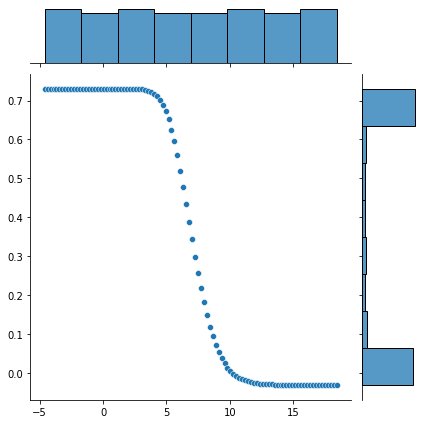

In [60]:
sns.jointplot(x=np.log(parameter_range), y = mean_test_mean)